In [2]:

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/saihaneesh26/ML_lab/main/datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,NaN,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [6]:
df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170,74.0,31.0,0.0,44.0,0.403,43.0,1.0
762,9.0,89,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [ ]:
#first scale and then split

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,:-1])
print(scaled_data[0])

[ 0.63406457  0.83162804  0.13798061  0.89819617 -0.6945094   0.19741299
  0.47165845  1.41741751]


In [9]:
target_0 = 0
target_1 = 0
for i in df['Outcome']:
  if i == 0:
    target_0+=1
  else:
    target_1+=1

In [10]:
print(target_0,target_1)

483 260


In [ ]:
#imbalanced data

In [11]:
scaled_data = np.array(scaled_data)
encoded_target = np.array(df['Outcome'])

In [16]:
#split
train_x,test_x,train_y,test_y = train_test_split(scaled_data,encoded_target,shuffle = True,stratify=encoded_target,random_state=2,test_size = 0.2)
print(len(test_x))

149


In [17]:
#model
model = MLPClassifier(hidden_layer_sizes=(6,5),learning_rate_init=0.001)
model.fit(train_x,train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(6, 5))

In [27]:
preds = model.predict(test_x) 
cm = confusion_matrix(test_y,preds)
cm

array([[84, 13],
       [22, 30]])

In [33]:
from sklearn.metrics import auc,roc_curve
probs = model.predict_proba(test_x)
pred_prob = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, pred_prob)
roc_auc = auc(fpr, tpr)

In [34]:
print("Accuracy:",accuracy_score(test_y,preds))
print("precision:",precision_score(test_y,preds))
print("recall:",recall_score(test_y,preds))

Accuracy: 0.7651006711409396
precision: 0.6976744186046512
recall: 0.5769230769230769


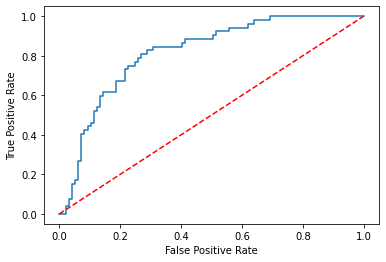

In [35]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#negative prediction value = (TN)/(TN+FN)
#positive predn val = (TP)/(TP+FP)